In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("FotData 환경 정상 작동")

FotData 환경 정상 작동


In [2]:
np.__version__, pd.__version__

('2.2.5', '2.3.3')

In [25]:
data = {
    "home_team": ["A", "B", "C", "A", "B", "C"],
    "away_team": ["B", "C", "A", "C", "A", "B"],
    "home_goals": [2, 1, 3, 0, 2, 4],
    "away_goals": [1, 2, 1, 1, 3, 2]
}

df = pd.DataFrame(data)
df

,home_team,away_team,home_goals,away_goals
0,A,B,2,1
1,B,C,1,2
2,C,A,3,1
3,A,C,0,1
4,B,A,2,3
5,C,B,4,2


In [4]:
df["home_goals"].mean()

np.float64(2.0)

In [5]:
df[df["home_goals"] > df["away_goals"]]

,home_team,away_team,home_goals,away_goals
0,A,B,2,1
2,C,A,3,1
5,C,B,4,2


In [6]:
df.groupby("home_team")["home_goals"].mean()

home_team
A    1.0
B    1.5
C    3.5
Name: home_goals, dtype: float64

In [7]:
df["home_win"] = df["home_goals"] > df["away_goals"]

In [8]:
df.groupby("home_team")["home_win"].mean()

home_team
A    0.5
B    0.0
C    1.0
Name: home_win, dtype: float64

In [9]:
df["result"] = df.apply(
    lambda x: "H" if x["home_goals"] > x["away_goals"]
    else "D" if x["home_goals"] == x["away_goals"]
    else "A",
    axis=1
)

df

,home_team,away_team,home_goals,away_goals,home_win,result
0,A,B,2,1,True,H
1,B,C,1,2,False,A
2,C,A,3,1,True,H
3,A,C,0,1,False,A
4,B,A,2,3,False,A
5,C,B,4,2,True,H


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["result_encoded"] = le.fit_transform(df["result"])

df

,home_team,away_team,home_goals,away_goals,home_win,result,result_encoded
0,A,B,2,1,True,H,1
1,B,C,1,2,False,A,0
2,C,A,3,1,True,H,1
3,A,C,0,1,False,A,0
4,B,A,2,3,False,A,0
5,C,B,4,2,True,H,1


In [11]:
X = df[["home_goals", "away_goals"]]
y = df["result_encoded"]

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
model.predict(X)

array([1, 0, 1, 0, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
accuracy_score(y, y_pred)

1.0

In [15]:
model.predict_proba(X)

array([[0.38031403, 0.61968597],
       [0.77183736, 0.22816264],
       [0.18041381, 0.81958619],
       [0.8267041 , 0.1732959 ],
       [0.7057817 , 0.2942183 ],
       [0.13502069, 0.86497931]])

In [17]:
new_game = pd.DataFrame([[2, 0]], columns=["home_goals", "away_goals"])
model.predict(new_game), model.predict_proba(new_game)

(array([1]), array([[0.23688837, 0.76311163]]))

In [18]:
new_game = pd.DataFrame([[0, 3]], columns=["home_goals", "away_goals"])
model.predict(new_game), model.predict_proba(new_game)

(array([0]), array([[0.94909974, 0.05090026]]))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 기존 X, y 그대로 사용
X = df[["home_goals", "away_goals"]]
y = df["result_encoded"]

# 1. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. 모델 다시 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. 테스트 데이터 예측
y_pred = model.predict(X_test)

# 4. 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[1 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [20]:
import numpy as np
import pandas as pd

np.random.seed(42)

# 팀 수
teams = ["A", "B", "C", "D"]

# 팀 공격력 / 수비력 랜덤 생성
team_stats = {
    team: {
        "attack": np.random.uniform(0.8, 2.5),
        "defense": np.random.uniform(0.8, 2.5)
    }
    for team in teams
}

# 경기 100개 생성
matches = []

for _ in range(100):
    home, away = np.random.choice(teams, 2, replace=False)
    
    home_attack = team_stats[home]["attack"]
    away_defense = team_stats[away]["defense"]
    
    # 승리 확률 계산 (공격 - 수비 차이 기반)
    win_prob = 1 / (1 + np.exp(-(home_attack - away_defense)))
    
    home_win = np.random.rand() < win_prob
    
    matches.append([
        home_attack,
        away_defense,
        int(home_win)
    ])

df = pd.DataFrame(matches, columns=["home_attack", "away_defense", "home_win"])
df.head()


,home_attack,away_defense,home_win
0,1.436718,1.817719,1
1,1.436718,1.065191,1
2,2.044390,1.065191,1
3,1.065232,2.272499,1
4,2.044390,2.416214,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[["home_attack", "away_defense"]]
y = df["home_win"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6333333333333333


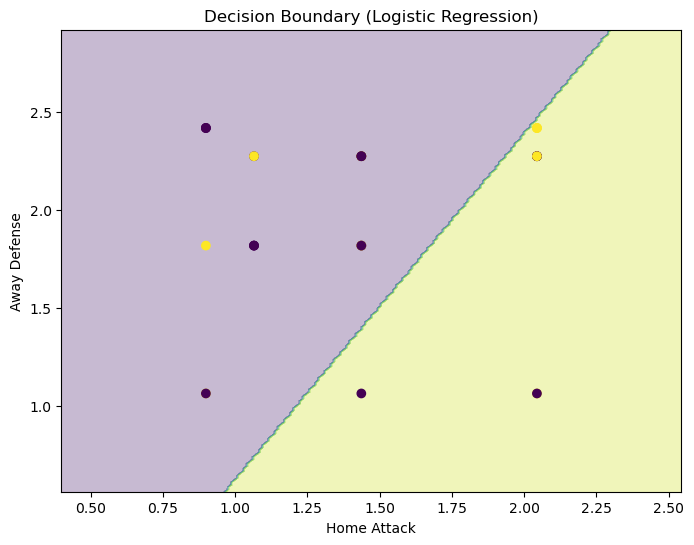

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 격자(grid) 만들기
x_min, x_max = X["home_attack"].min() - 0.5, X["home_attack"].max() + 0.5
y_min, y_max = X["away_defense"].min() - 0.5, X["away_defense"].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# 2. 모델 예측
grid = pd.DataFrame(
    np.c_[xx.ravel(), yy.ravel()],
    columns=["home_attack", "away_defense"]
)

Z = model.predict(grid)
Z = Z.reshape(xx.shape)


# 3. 시각화
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)

# 실제 데이터 표시
plt.scatter(
    X_test["home_attack"],
    X_test["away_defense"],
    c=y_test,
)

plt.xlabel("Home Attack")
plt.ylabel("Away Defense")
plt.title("Decision Boundary (Logistic Regression)")
plt.show()

In [27]:
# 새로운 피처 생성
df["goal_diff"] = df["home_goals"] - df["away_goals"]
df["total_goals"] = df["home_goals"] + df["away_goals"]

df

,home_team,away_team,home_goals,away_goals,goal_diff,total_goals
0,A,B,2,1,1,3
1,B,C,1,2,-1,3
2,C,A,3,1,2,4
3,A,C,0,1,-1,1
4,B,A,2,3,-1,5
5,C,B,4,2,2,6


In [33]:
# 결과 라벨 생성
df["result"] = df["goal_diff"].apply(lambda x: 1 if x > 0 else 0)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[["home_goals", "away_goals"]]
y = df["result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


In [34]:
model.predict_proba(X_test)

array([[0.48243116, 0.51756884],
       [0.78437535, 0.21562465]])

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 랜덤 경기 100개 생성
np.random.seed(42)

n = 100

data = {
    "home_goals": np.random.randint(0, 5, n),
    "away_goals": np.random.randint(0, 5, n)
}

df = pd.DataFrame(data)

# 2. 파생 변수 생성
df["goal_diff"] = df["home_goals"] - df["away_goals"]
df["total_goals"] = df["home_goals"] + df["away_goals"]

# 3. 승패 라벨 생성 (홈승=1, 아니면 0)
df["result"] = df["goal_diff"].apply(lambda x: 1 if x > 0 else 0)

df.head()

,home_goals,away_goals,goal_diff,total_goals,result
0,3,3,0,6,0
1,4,0,4,4,1
2,2,3,-1,5,0
3,4,1,3,5,1
4,4,0,4,4,1


In [36]:
X = df[["goal_diff", "total_goals"]]
y = df["result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


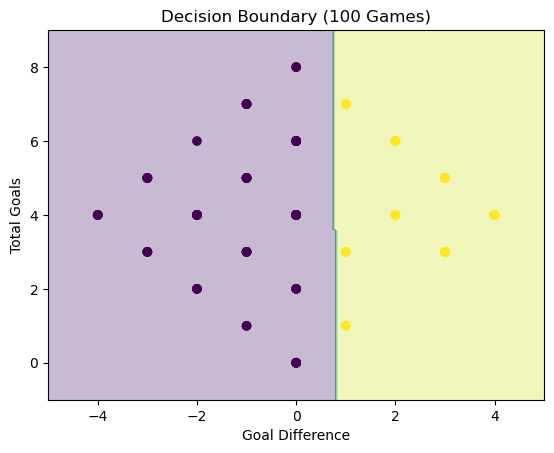

In [39]:
# 결정경계 시각화

x_min, x_max = X["goal_diff"].min() - 1, X["goal_diff"].max() + 1
y_min, y_max = X["total_goals"].min() - 1, X["total_goals"].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = pd.DataFrame(
    np.c_[xx.ravel(), yy.ravel()],
    columns=["goal_diff", "total_goals"]
)
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(
    df["goal_diff"],
    df["total_goals"],
    c=df["result"]
)

plt.xlabel("Goal Difference")
plt.ylabel("Total Goals")
plt.title("Decision Boundary (100 Games)")
plt.show()